<a href="https://colab.research.google.com/github/Valeeew/Data_management_of_an_online_store/blob/master/Data_management_of_an_online_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Management & Optimisation d'une boutique en ligne
## Par Valentin MONTEIRO 
---
### Sommaire
> ### IMPORT
- [Import des library](#scrollTo=tAgUgPb2dUt3&line=1&uniqifier=1)
- [Import des DATA](#scrollTo=LGGkJyQgd2Vc&line=3&uniqifier=1)
- Traitement des DATA
>> - [df_web](#scrollTo=THwlX1u91f2t&line=4&uniqifier=1)
>> - [df_liaison](#scrollTo=ykl7KSWzVFsA&line=1&uniqifier=1)❓
- [Lexique des données](#scrollTo=oG89DAzeosCW&line=1&uniqifier=1)

> ### Objectifs
- [Objectifs](#scrollTo=zVQGfyVrRI86&line=15&uniqifier=1)

> ### Code
>> - [Rapprocher les 2 exports](#scrollTo=VpQfY-tkWMYh&line=2&uniqifier=1)
>> - [Calcul CA (turnover) par produit](#scrollTo=nGntr2d-xQYs&line=1&uniqifier=1)
>> - [Calcul du CA (turnover) des ventes en ligne](#scrollTo=dwOAg5jrtGl2&line=1&uniqifier=1)



## IMPORT

---
> ### Import des Libraries
---



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

---
> ### Import des DATA from Github
---




In [2]:
# Clone the entire repo & import DATA
!git clone -l -s git://github.com/Valeeew/Data_management_of_an_online_store cloned-repo
%cd cloned-repo
!ls

# Enregistrement des DATA dans les DATAframe
df_erp = pd.read_excel("erp.xlsx")
df_liaison = pd.read_excel("liaison.xlsx")
df_web = pd.read_excel("web.xlsx")

fatal: destination path 'cloned-repo' already exists and is not an empty directory.
/content/cloned-repo
cloned-repo				  erp.csv   liaison.csv   web.csv
Data_management_of_an_online_store.ipynb  erp.xlsx  liaison.xlsx  web.xlsx


/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:296: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


---
> ### Traitement des DATA
---




In [19]:
!pip install --upgrade "openpyxl== 3.0.0"

     |████████████████████████████████| 172 kB 5.2 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241207 sha256=3b62b9af568332be49cbf3447f4c8ea49e76fae61e2c7f60634cb4af82e90815
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


#### df_web

In [3]:
# Traitement des données web inutiles
df_web = df_web.drop(["virtual","downloadable","rating_count","average_rating","tax_class","post_content","comment_status","ping_status","post_password","post_content_filtered","post_parent","menu_order","comment_count"], axis = 1)
# Remplacement des données NaN dans df_web.total_sales
df_web.total_sales = df_web.total_sales.fillna(0)
# Remplacement des données tax_status ➡️ taxable = 1 et Nan = 0
# Suppression des lignes qui ne sont pas taxées
df_web = df_web[df_web.tax_status.notnull()]
#df_web.tax_status = df_web.tax_status.replace("taxable",1)

#### df_liaison

In [4]:
#Suppression des valeurs NaN dans id_web ❓
#df_liaison = df_liaison[df_liaison.id_web.notnull()]

---
> ### Lexique des données
---





#### df_erp

| Variable | Description | Type | PK |
| :--------------- |:---------------| :-----| :---|
| product_id | références produit | int | ✅ |
| onsale_web | vendu en ligne | boolean ||
| price | prix de vente | float ||
| stock_quantity | quantité dans le stock | int ||
|stock_status | État de stock | str ||

#### df_web

| Variable | Description | Type | PK |
| :--------------- |:---------------| :-----| :---|
| sku | références produit | int | ✅ |
| total_sales | nombre de vente | Int ||
| tax_status | produit taxable ou non | Boolean ||
| post_author | auteur de l'article | int ||
| post_date | Date de publication | date ||
| post_date_gmt | Date de publication h GMT| date ||
| post_title | titre de l'article | str ||
| post_excerpt | description de l'article | str ||
| post_status | statut de l'article | str ||
| post_name | Nom de l'article | str ||
| post_modified | Date dernière MAJ | date ||
| post_modified_gmt | Date dernière MAJ h GMT | date ||
| guid | lien | str ||
| post_type | type de l'article | str ||
| post_mime_type | Chemin de l'image | str ||

---
> ### Objectifs
---

- Rapprocher les 2 exports
- Chiffre d’affaires par produit
- Total du chiffre d’affaires réalisé en ligne.
- Analyser la variable price
- - Détecter d’éventuelles valeurs aberrantes
- - Lister les valeur aberrantes 
- - Faire une représentation graphique

---
> ### Code
---

---
>#### Rapprocher les 2 exports
---

In [5]:
# Merge df_erp & df_liaison
df_erp_liaison = df_erp.merge(df_liaison, how="inner", right_on="product_id", left_on="product_id")
# Merge df_erp_liaison & df_web
df_bottleneck = df_erp_liaison.merge(df_web, how="inner", right_on="sku", left_on="id_web")

---
>#### Calcul du CA (turnover) produit
---

In [6]:
df_bottleneck["turnover"] = df_bottleneck.price * df_bottleneck.total_sales

---
> #### Calcul du CA (turnover) des vente en ligne
---

In [7]:
df_bottleneck_online = df_bottleneck[(df_bottleneck.onsale_web == 1) == True]
turnover_online = df_bottleneck_online.turnover.sum()

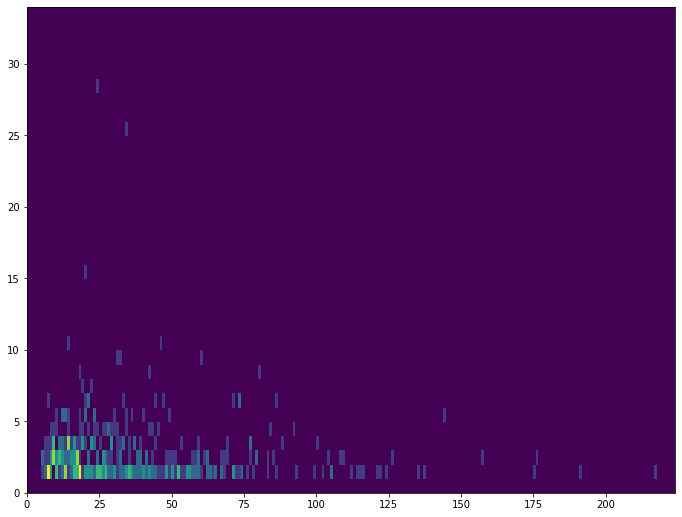

In [8]:
repartition_des_prix = df_bottleneck.price.value_counts()
prix = df_bottleneck.price.unique()
repartition_des_prix_avant = plt.figure(figsize=(12,9))
ax = repartition_des_prix_avant.add_axes([0.15,0.15,0.75,0.75])
ax.hist2d(prix, repartition_des_prix, bins=(np.arange(0, 225, 1), np.arange(0 , 35, 1)))

plt.show(repartition_des_prix_avant)

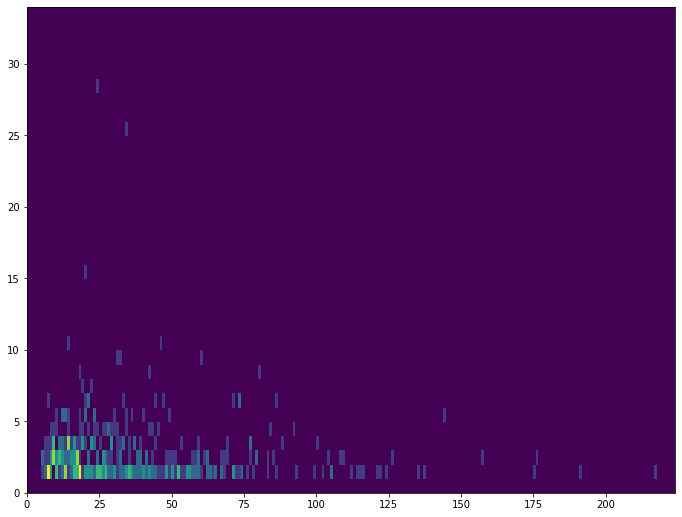

In [9]:
repartition_des_prix_avant

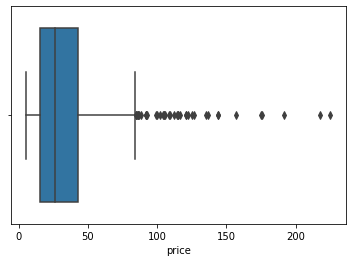

In [10]:
sns.boxplot(x = df_bottleneck.price)

In [11]:
def z_score(data):
  resultat_outliers = []
  threshold = 3
  mean = np.mean(data)
  std = np.std(data)

  for i in data:
    score = (i-mean)/std
    if np.abs(score) > threshold:
      resultat_outliers.append(i)
  return resultat_outliers


In [12]:
outliers_prix_z_score = z_score(df_bottleneck.price)

In [13]:
outliers_prix

[144.0,
 144.0,
 225.0,
 126.5,
 176.0,
 157.0,
 137.0,
 217.5,
 112.0,
 124.8,
 175.0,
 191.3,
 122.0,
 114.0,
 135.0,
 116.4,
 115.0,
 121.0,
 115.0,
 121.0]

In [37]:
def outliers_IQR(data):
  q1 = np.quantile(data, 0.25)
  q3 = np.quantile(data, 0.75)
  resultat_outliers = []
  iqr = q3-q1
  lower_range = q1 - 1.5*iqr
  upper_range = q3 + 1.5*iqr
  for i in data:
    if i < lower_range  or i > upper_range:
      resultat_outliers.append(i)
  return resultat_outliers
  

In [38]:
outliers_IQR(df_bottleneck.price)


[86.1,
 86.1,
 144.0,
 144.0,
 84.7,
 84.7,
 92.0,
 92.0,
 100.0,
 88.4,
 225.0,
 126.5,
 85.6,
 176.0,
 108.5,
 157.0,
 104.0,
 109.6,
 102.3,
 137.0,
 217.5,
 105.0,
 105.0,
 112.0,
 86.8,
 92.0,
 124.8,
 175.0,
 191.3,
 93.0,
 122.0,
 114.0,
 135.0,
 105.6,
 116.4,
 115.0,
 121.0,
 99.0,
 115.0,
 121.0]